In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import pickle
import os
import missingno as msno
import shapely.io
from shapely.geometry import Point, LineString

from lxml import etree
from datetime import time

# Load GTFS data

## Shapes = edges

+ Add `from_node` and `to_node` attributes 

In [3]:
shapes_filename = 'data/redes/metro/20241023_130210_Metro_Valencia/shapes.txt'

shapes = pd.read_csv(shapes_filename)
shapes

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1,39.622841,-0.590278,1
1,1,39.614395,-0.595912,2
2,1,39.613392,-0.596234,3
3,1,39.607540,-0.594893,4
4,1,39.598881,-0.583928,5
...,...,...,...,...
895,74,39.452591,-0.353216,4
896,74,39.452446,-0.360125,5
897,74,39.459373,-0.365110,6
898,74,39.463913,-0.369531,7


In [4]:
shapes['geometry'] = shapes.apply(lambda row: Point(row['shape_pt_lon'], row['shape_pt_lat']), axis='columns')
shapes

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,geometry
0,1,39.622841,-0.590278,1,POINT (-0.590277791 39.6228408813)
1,1,39.614395,-0.595912,2,POINT (-0.5959117413 39.6143951416)
2,1,39.613392,-0.596234,3,POINT (-0.5962336063 39.6133918762)
3,1,39.607540,-0.594893,4,POINT (-0.5948925018 39.6075401306)
4,1,39.598881,-0.583928,5,POINT (-0.5839277506 39.5988807678)
...,...,...,...,...,...
895,74,39.452591,-0.353216,4,POINT (-0.3532159925 39.4525909424)
896,74,39.452446,-0.360125,5,POINT (-0.3601250052 39.4524459839)
897,74,39.459373,-0.365110,6,POINT (-0.3651100099 39.4593734741)
898,74,39.463913,-0.369531,7,POINT (-0.3695310056 39.4639129639)


In [5]:
lines = shapes.groupby('shape_id')['geometry'].apply(lambda x: LineString(x.to_list()))
lines = gpd.GeoDataFrame(lines, geometry='geometry')
lines

,geometry
shape_id,
1,"LINESTRING (-0.59028 39.62284, -0.59591 39.614..."
2,"LINESTRING (-0.45753 39.59061, -0.44945 39.586..."
3,"LINESTRING (-0.33106 39.58852, -0.33044 39.579..."
5,"LINESTRING (-0.43045 39.5099, -0.42475 39.5122..."
6,"LINESTRING (-0.33824 39.46494, -0.34297 39.466..."
7,"LINESTRING (-0.33824 39.46494, -0.34297 39.466..."
8,"LINESTRING (-0.37254 39.49595, -0.37223 39.496..."
9,"LINESTRING (-0.33824 39.46494, -0.33397 39.463..."
10,"LINESTRING (-0.33824 39.46494, -0.33648 39.464..."


In [6]:
lines = lines.set_crs('EPSG:4326')

In [7]:
lines.to_file('data/redes/metro/metrovalencia_shp/metrovalencia_links.shp', driver='ESRI Shapefile')

<Axes: >

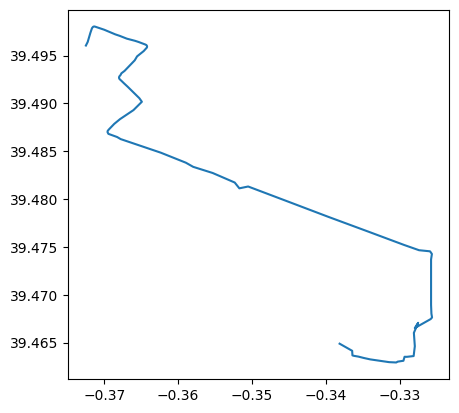

In [8]:
lines.sample(1).plot()

## Stops = nodes

In [9]:
stops_filename = 'data/redes/metro/20241210_210144_Metro_Valencia/stops.txt'

stops = pd.read_csv(stops_filename)
stops

,stop_id,stop_name,stop_lat,stop_lon,zone_id
0,30,València Sud,39.440811,-0.410647,A
1,31,Paiporta,39.432262,-0.418061,A B
2,32,Picanya,39.433121,-0.437158,A B
3,33,Torrent,39.434647,-0.460986,A B
4,50,Col·legi El Vedat,39.423134,-0.460653,A B
...,...,...,...,...,...
138,193,Quatre Carreres,39.452447,-0.360125,A
139,194,Ciutat Arts i Ciències - Justícia,39.452592,-0.353216,A
140,195,Oceanogràfic,39.452038,-0.347342,A
141,196,Moreres,39.450150,-0.338408,A


In [10]:
stops['geometry'] = stops.apply(lambda row: Point(row['stop_lon'], row['stop_lat']), axis='columns')

<Axes: >

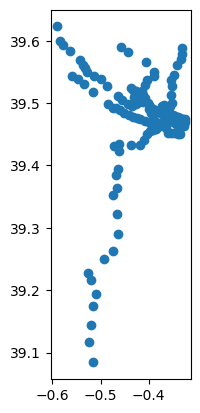

In [11]:
stops = gpd.GeoDataFrame(stops, geometry='geometry')
stops = stops.set_crs('EPSG:4326')
stops.plot()

In [12]:
stops.to_file('data/redes/metro/metrovalencia_shp/metrovalencia_nodes.shp', driver='ESRI Shapefile')

# Split links into segments

In [13]:
stops

,stop_id,stop_name,stop_lat,stop_lon,zone_id,geometry
0,30,València Sud,39.440811,-0.410647,A,POINT (-0.41065 39.44081)
1,31,Paiporta,39.432262,-0.418061,A B,POINT (-0.41806 39.43226)
2,32,Picanya,39.433121,-0.437158,A B,POINT (-0.43716 39.43312)
3,33,Torrent,39.434647,-0.460986,A B,POINT (-0.46099 39.43465)
4,50,Col·legi El Vedat,39.423134,-0.460653,A B,POINT (-0.46065 39.42313)
...,...,...,...,...,...,...
138,193,Quatre Carreres,39.452447,-0.360125,A,POINT (-0.36012 39.45245)
139,194,Ciutat Arts i Ciències - Justícia,39.452592,-0.353216,A,POINT (-0.35322 39.45259)
140,195,Oceanogràfic,39.452038,-0.347342,A,POINT (-0.34734 39.45204)
141,196,Moreres,39.450150,-0.338408,A,POINT (-0.33841 39.45015)


## Routes

In [14]:
routes_filename = 'data/redes/metro/20241210_210144_Metro_Valencia/routes.txt'

routes = pd.read_csv(routes_filename)
routes

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,1-SE-TO,1,1,1 - 1,1,FEC601,000000
1,1-TO-SE,1,1,1 - Villanueva de Castellón a Bétera,1,FEC601,000000
2,AA-MC,1,5,5 - Torrent Av. a Marítim - Serreria,1,F28D01,000000
3,AA-MM,1,5,5 - Torrent Av. a Marítim - Serreria,1,F28D01,000000
4,AB-AE,1,3,3 - Alboraya-Peris Aragó a Aeroport,1,DD052C,000000
...,...,...,...,...,...,...,...
298,VS-PS,1,1,1 - Valencia Sud a Picasent,1,FEC601,000000
299,VS-PT,1,2,2 - Torrent Av. a Llíria,1,E60096,000000
300,VS-TA,1,1,1 - Valencia Sud a Torrent Avinguda,1,FEC601,000000
301,VS-TO,1,1,1 - Valencia Sud a Torrent,1,FEC601,000000


In [15]:
routes['route_type'].value_counts()

route_type
0    168
1    135
Name: count, dtype: int64

## Stop times

In [70]:
stop_times_filename = 'data/redes/metro/20241210_210144_Metro_Valencia/stop_times.txt'

stop_times = pd.read_csv(stop_times_filename)
stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,timepoint
0,2567827,06:34:00,06:34:00,30,0,1
1,2567827,06:36:00,06:36:00,31,1,1
2,2567827,06:38:00,06:38:00,32,2,1
3,2567827,06:42:00,06:42:00,33,3,1
4,2567827,06:47:00,06:47:00,50,4,1
...,...,...,...,...,...,...
50503,4462844,23:35:00,23:35:00,194,4,1
50504,4462844,23:38:00,23:38:00,193,5,1
50505,4462844,23:40:00,23:40:00,192,6,1
50506,4462844,23:42:00,23:42:00,191,7,1


In [71]:
stop_times.dtypes

trip_id            int64
arrival_time      object
departure_time    object
stop_id            int64
stop_sequence      int64
timepoint          int64
dtype: object

In [72]:
stop_times['timepoint'].value_counts()

timepoint
1    50508
Name: count, dtype: int64

In [73]:
stop_times['arrival_time_min'] = pd.to_timedelta(stop_times['arrival_time']).dt.total_seconds().div(60).astype(int)
stop_times['departure_time_min'] = pd.to_timedelta(stop_times['departure_time']).dt.total_seconds().div(60).astype(int)

In [74]:
stop_times['departure_time_min'].eq(stop_times['arrival_time_min']).sum(), stop_times.shape[0]

# arrival and departure times are always equal

(np.int64(50508), 50508)

In [75]:
stop_times['time_moving'] = stop_times['arrival_time_min'] - stop_times['departure_time_min'].shift(1)
stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,timepoint,arrival_time_min,departure_time_min,time_moving
0,2567827,06:34:00,06:34:00,30,0,1,394,394,NaN
1,2567827,06:36:00,06:36:00,31,1,1,396,396,2.0
2,2567827,06:38:00,06:38:00,32,2,1,398,398,2.0
3,2567827,06:42:00,06:42:00,33,3,1,402,402,4.0
4,2567827,06:47:00,06:47:00,50,4,1,407,407,5.0
...,...,...,...,...,...,...,...,...,...
50503,4462844,23:35:00,23:35:00,194,4,1,1415,1415,2.0
50504,4462844,23:38:00,23:38:00,193,5,1,1418,1418,3.0
50505,4462844,23:40:00,23:40:00,192,6,1,1420,1420,2.0
50506,4462844,23:42:00,23:42:00,191,7,1,1422,1422,2.0


In [76]:
stop_times.groupby('trip_id')['arrival_time_min'].shift(1).fillna(0)

0           0.0
1         394.0
2         396.0
3         398.0
4         402.0
          ...  
50503    1413.0
50504    1415.0
50505    1418.0
50506    1420.0
50507    1422.0
Name: arrival_time_min, Length: 50508, dtype: float64

## Trips

In [77]:
trips_filename = 'data/redes/metro/20241210_210144_Metro_Valencia/trips.txt'

trips = pd.read_csv(trips_filename)
trips

,route_id,service_id,trip_id,trip_headsign,shape_id
0,VS-VC,1442,2567827,Castelló,2
1,VS-EM,1442,2568143,Empalme,48
2,VS-BT,1442,2568144,Bétera,48
3,EM-VC,1442,2567828,Castelló,2
4,TO-BT,1442,2568145,Bétera,48
...,...,...,...,...,...
3084,V9-186-66,2765,4462248,Machado,69
3085,V9-186-66,2765,4462249,Machado,69
3086,V9-186-56,2765,4461945,Riba-roja de Túria,69
3087,V9-186-66,2765,4462250,Machado,69


In [78]:
trips['shape_id'].value_counts()

shape_id
6     270
5     264
25    257
3     210
1     193
74    183
73    183
48    173
47    164
69    159
43    143
2     139
7     113
45    111
8     103
10    100
59     84
44     82
9      82
70     76
Name: count, dtype: int64

In [83]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,shape_id
0,VS-VC,1442,2567827,Castelló,2
1,VS-EM,1442,2568143,Empalme,48
2,VS-BT,1442,2568144,Bétera,48
3,EM-VC,1442,2567828,Castelló,2
4,TO-BT,1442,2568145,Bétera,48


In [84]:
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,1-SE-TO,1,1,1 - 1,1,FEC601,000000
1,1-TO-SE,1,1,1 - Villanueva de Castellón a Bétera,1,FEC601,000000
2,AA-MC,1,5,5 - Torrent Av. a Marítim - Serreria,1,F28D01,000000
3,AA-MM,1,5,5 - Torrent Av. a Marítim - Serreria,1,F28D01,000000
4,AB-AE,1,3,3 - Alboraya-Peris Aragó a Aeroport,1,DD052C,000000


In [82]:
pd.merge(trips, routes, left_on='trip_id', right_on='trip_id', how='left')

KeyError: 'trip_id'